<img height="60px" src="logo.png" align="right" hspace="20px" vspace="5px">
<h1>ECPaint</h1>
==============
<h3>Revenue & Traffic Report (2018-2019)</h3>
What started out as an Ecommerce side hustle, turned out to be a perfect source of data for my First Data Science project. The platform I worked with provides the data separately and I've managed to parse them into 3 separate category (Monthly, Weekly, Daily) Analysing the flow of traffic may help me make better business decisions.
<h3>Objective</h3>
Finding ideas to generate more Revenue $$$

#### Modules

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

#### Loading Files

In [2]:
# Monthly data since (Dec 2017)
# Weekly data since (September 2018)
# Daily data since (30th September 2018)
monthly = pd.read_csv('Traffic_Monthly.csv')
daily   = pd.read_csv('Traffic_Daily.csv')

# Choose period (monthly,weekly,daily)
period = daily

# data sample
period.head()

,Date,Revenue,Visitors,Buyers,Orders,Pageviews,Units Sold,Conversion Rate,Revenue per Buyer,Visitor Value,Add to Cart Visitors,Add to Cart Units,Wishlists,Wishlist Visitor
0,2018-09-30,0.0,40,0,0,119,0,0.00%,0.0,0.0,2,3,2,1
1,2018-10-01,0.0,36,0,0,106,0,0.00%,0.0,0.0,0,0,1,1
2,2018-10-02,0.0,43,0,0,127,0,0.00%,0.0,0.0,2,3,1,1
3,2018-10-03,0.0,31,0,0,86,0,0.00%,0.0,0.0,3,4,-,-
4,2018-10-04,0.0,32,0,0,95,0,0.00%,0.0,0.0,1,1,-,-


#### Basic Overview 

In [3]:
Revenue          = period['Revenue']
Total_Views      = period['Pageviews'].sum()
Number_of_Visits = period['Visitors'].sum()
Buyers           = period['Buyers']
Time             = period.columns[0]
Conversion_Rate  = round((Buyers.sum() / Number_of_Visits) * 100, 2)
Views_to_dollar  = round(Total_Views   / Revenue.sum(), 2)
RM_per_view      = round(Revenue.sum() / Total_Views, 2)

## Highlights

In [4]:
print(f'Throughout the period the store generated (RM {monthly["Revenue"].sum()}) in Revenue,',
      f'a Monthly Average of (RM {round(monthly["Revenue"].mean(), 2)}).\n\n',
      f'In a period of ({period[Time].count()} {Time}s), the store generated ({Total_Views}) impressions,',
      f'({Number_of_Visits}) clicks',
      f'and ({Buyers.sum()}) Buyers.\n\n', 
      f'Thus the Conversion Rate is ({Conversion_Rate}%),\n\n',
      f'Generating (RM {RM_per_view}) per view.')

Throughout the period the store generated (RM 12446.13) in Revenue, a Monthly Average of (RM 829.74).

 In a period of (157 Dates), the store generated (24068) impressions, (7469) clicks and (36) Buyers.

 Thus the Conversion Rate is (0.48%),

 Generating (RM 0.23) per view.


## Hypothesis

May need to work on:
    
    a) Generating more Views (Impressions)

    b) Improving Visits (Clicks) 

    c) Improving Conversion Rate (Buyers)

Page Views & Revenue
 [[1.         0.13441181]
 [0.13441181 1.        ]]


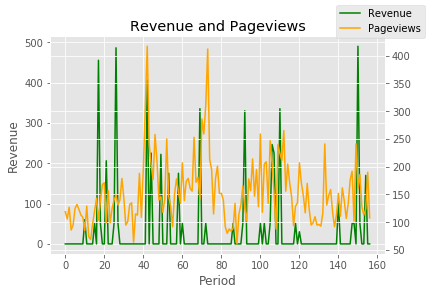

In [5]:
X = 'Pageviews'
print('Page Views & Revenue\n', np.corrcoef(period[X], Revenue))

fig, ax = plt.subplots()
plt.xlabel('Period')
plt.ylabel('Revenue')

ax1 = ax.twinx()

ax.plot(Revenue   , 'green', label = 'Revenue')
ax1.plot(period[X],'orange', label = X)

fig.legend()
plt.title('Revenue and Pageviews')
plt.show()

---
# Construct Machine Learning Model
Let's make a Model to predict our Average Monthly Revenue.


Input Features are Visitors, Pageviews, Add to Cart Visitors, Add to Cart Units, Wishlists, Wishlist Visitor.
##  Decision Tree Model

In [6]:
# Defining our features/variables
Features = period[['Visitors', 'Pageviews', 'Add to Cart Visitors', 'Add to Cart Units', 'Wishlists', 'Wishlist Visitor']]
Features = Features.replace('-',0)

### Split,  Train, Test
Let's split the data and use some for training and some for evaluating the model. We'll test the model using MAE

In [7]:
# Import train_test_split & DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# split data
train_x, test_x, train_y, test_y = train_test_split(Features, Revenue, random_state = 0)

# initialize & train 
Tree_Model = DecisionTreeRegressor(random_state = 0)

Tree_Model.fit(train_x, train_y)

# checking error range
predicted = Tree_Model.predict(test_x)

print('Error Range:', mean_absolute_error(predicted, test_y))

Error Range: 74.67649999999999


Seems alright, considering the Model doesn't know the value of the Products sold.

### Limit leaf nodes
Let's limit the decision (nodes) made within the model

In [8]:
def TreeError(nodes, train_x, train_y, test_y):
    """for looping range of nodes, returns MAE"""
    model = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=0)
    model.fit(train_x, train_y)
    predicted_vals = model.predict(test_x)
    return mean_absolute_error(test_y, predicted_vals)

In [9]:
for nodes in [2, 3, 4, 5, 6, 7, 10, 15, 25, 50]:
    model_error = TreeError(nodes, train_x, train_y, test_y)
    print(f'Max nodes: {nodes} \t\t Mean Absolute Error: {model_error}')

Max nodes: 2 		 Mean Absolute Error: 61.44021336206896
Max nodes: 3 		 Mean Absolute Error: 62.91057515991471
Max nodes: 4 		 Mean Absolute Error: 61.393179263258176
Max nodes: 5 		 Mean Absolute Error: 61.393179263258176
Max nodes: 6 		 Mean Absolute Error: 63.28462468445726
Max nodes: 7 		 Mean Absolute Error: 60.447149216125425
Max nodes: 10 		 Mean Absolute Error: 68.34498712611779
Max nodes: 15 		 Mean Absolute Error: 63.83522074109169
Max nodes: 25 		 Mean Absolute Error: 74.26025886524823
Max nodes: 50 		 Mean Absolute Error: 74.6765


Limiting leaf nodes seems to drop errors. Let's use this new information to train our model. 

In [10]:
Tree_Model = DecisionTreeRegressor(max_leaf_nodes=2, random_state=0)
Tree_Model.fit(Features, Revenue)

# Features = [Visitors, Pageviews, Add to Cart Visitors, Add to Cart Units, Wishlists, Wishlist Visitor]
Tree_Model.predict([[88, 400, 4, 10, 5, 3]])

array([32.28320513])

---
## Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestRegressor

Forest_Model = RandomForestRegressor(random_state=0)
Forest_Model.fit(train_x, train_y)
predicted = Forest_Model.predict(test_x)
print(f'Error range of {mean_absolute_error(predicted, test_y)}')

Error range of 70.429625


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model Prediction

In [12]:
# 'Visitors', 'Pageviews', 'Add to Cart Visitors', 'Add to Cart Units', 'Wishlists', 'Wishlist Visitor'
Forest_Model.predict([[10000, 20000, 80, 140, 80, 60]])

array([284.256])

---
*Model's projection does not seem to favour 'more views'.*

### To be Continued